In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.phantom import Phantom
from pyinverse.ellipse import Ellipse, ellipse_raster
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid

In [3]:
p = Phantom()
e = p._ellipses[4]

In [4]:
e

Ellipse(rho=0.1, a=0.21, b=0.25, x0=0.0, y0=0.35, phi_deg=0.0)

In [5]:
N1 = N2 = 16
grid = RegularGrid(RegularAxis.linspace(-1, 1, N1), 
                   RegularAxis.linspace(-1, 1, N2))

In [6]:
A = ellipse_raster(e, grid)

<IPython.core.display.Javascript object>


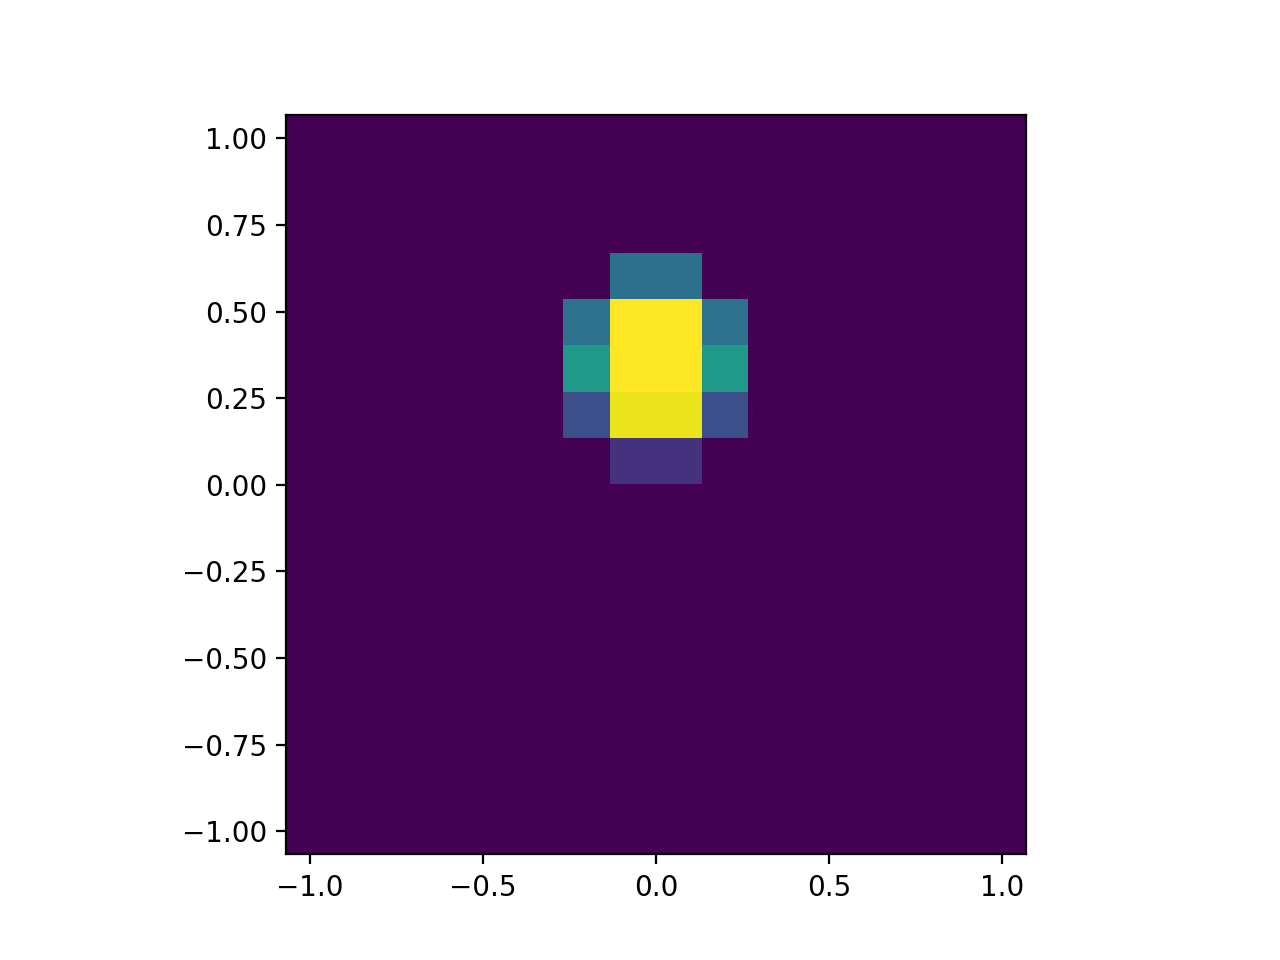

In [7]:
fig, ax = plt.subplots()
grid.imshow(ax, A)

In [8]:
grid.axis_y.borders

array([-1.06666667, -0.93333333, -0.8       , -0.66666667, -0.53333333,
       -0.4       , -0.26666667, -0.13333333,  0.        ,  0.13333333,
        0.26666667,  0.4       ,  0.53333333,  0.66666667,  0.8       ,
        0.93333333,  1.06666667])

In [9]:
ellipse = e
regular_grid = grid

In [10]:
min_x, min_y, max_x, max_y = ellipse.bounds

In [11]:
J1 = max(np.argwhere(regular_grid.axis_x.borders[:-1] >= min_x)[0][0] - 1, 0)
J2 = min(np.argwhere(regular_grid.axis_x.borders[1:] <= max_x)[-1][0] + 1, regular_grid.axis_x.N - 1)
I1 = max(np.argwhere(regular_grid.axis_y.borders[:-1] >= min_y)[0][0] - 1, 0)
I2 = min(np.argwhere(regular_grid.axis_y.borders[1:] <= max_y)[-1][0] + 1, regular_grid.axis_y.N - 1)

In [12]:
(J1, J2), (I1, I2)

((6, 9), (8, 12))

In [13]:
X, Y = np.meshgrid(regular_grid.axis_x.borders[J1:J2+2] - ellipse.x0,
                   regular_grid.axis_y.borders[I1:I2+2] - ellipse.y0)
D = (X*ellipse.cos_phi + Y*ellipse.sin_phi)**2 / ellipse.a_sq + (Y*ellipse.cos_phi - X*ellipse.sin_phi)**2 / ellipse.b_sq

In [14]:
I = np.zeros_like(A)
for i, I_i in enumerate(range(I1, I2 + 1)):
    for j, I_j in enumerate(range(J1, J2 + 1)):
        D_corners = np.array([D[i, j], D[i, j+1], D[i+1, j], D[i+1, j+1]])
        I[I_i, I_j] = sum(D_corners <= 1)

In [15]:
I[::-1, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 2., 2., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 4., 4., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 4., 4., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 3., 3., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

<IPython.core.display.Javascript object>


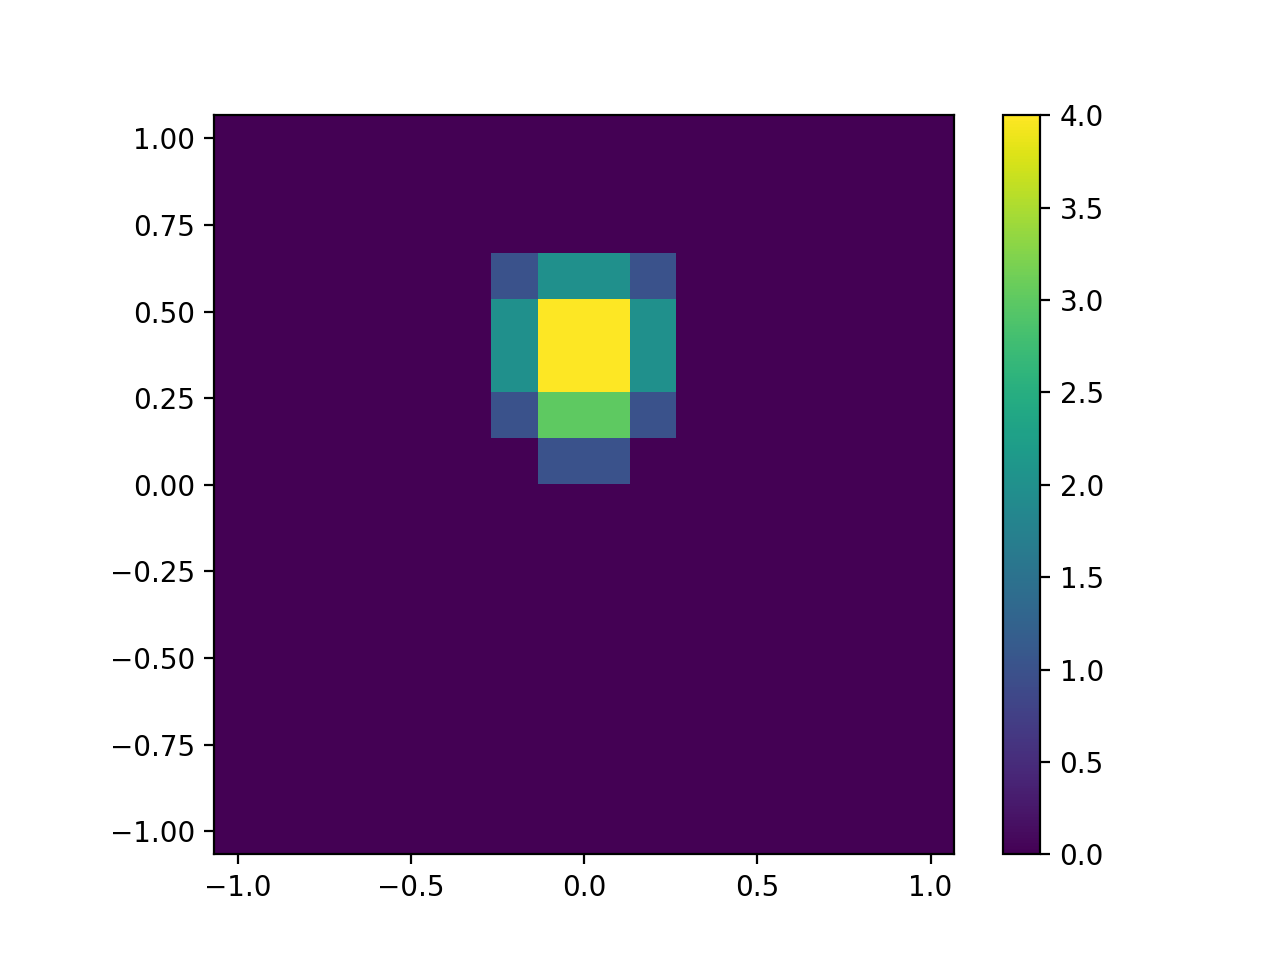

In [16]:
fig, ax = plt.subplots()
im = grid.imshow(ax, I)
fig.colorbar(im)